<a href="https://colab.research.google.com/github/krishnaaxo/Times-Series/blob/main/Smothing_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Simple exponential smoothing

In [1]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'FB.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [3]:
X = df['Close']

In [4]:
test = X.iloc[-30:]

In [5]:
train = X.iloc[:-30]

In [6]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [7]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 3060.521317348409
MAE is : 55.15630993446825
RMSE is : 55.32197861020888
MAPE is : 28.209605312764108
R2 is : -166.21609234618037

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945014
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
R2 is : -6.113609198116423

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 108.84519758407878
MAE is : 9.515377334756147
RMSE is : 10.432890183648958
MAPE is : 4.8267295696296815
R2 is : -4.946917770998033

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 101.81858360183577
MAE is : 9.13869749146715
RMSE is : 10.090519491177636
MAPE is : 4.633748018445831
R2 is : -4.563008361226733

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 101.76016636355348
MAE is : 9.135500785521595
RMSE is : 10.087624416261416
MAPE is : 4.632110274130486
R2 is : -4.55981664932593

,RMSE,smoothing parameter
10,9.878157,1.0
9,9.926882,0.9
8,10.008074,0.8


In [8]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945014
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
R2 is : -6.113609198116423



In [9]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 97.68044338619876
MAE is : 8.909413652138449
RMSE is : 9.883341711496104
MAPE is : 4.516280753437192
R2 is : -4.336914972326928



In [10]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Mon, 12 Apr 2021"
Box-Cox:,False,Time:,16:48:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808449,alpha,True
initial_level,76.519998,l.0,True


In [11]:

df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229    , 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")


In [12]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229    , 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

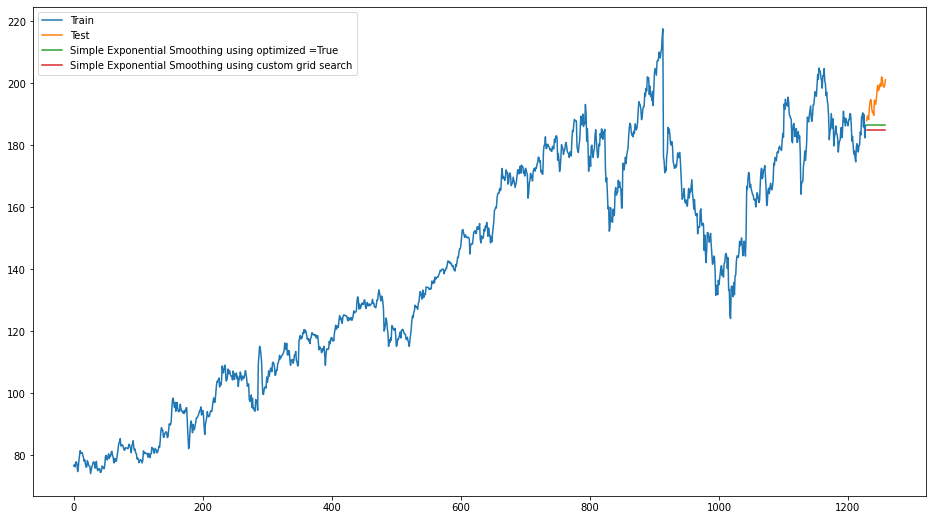

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

# 2. Double Exponential Smoothing 

In [14]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [15]:
df['Close'] = df['Close']

In [16]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))



In [17]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Streaming output truncated to the last 5000 lines.
1245    201.132689
1246    201.877914
1247    202.623138
1248    203.368363
1249    204.113588
1250    204.858813
1251    205.604038
1252    206.349263
1253    207.094487
1254    207.839712
1255    208.584937
1256    209.330162
1257    210.075387
1258    210.820612
dtype: float64
 RMSE is 5.708272613337477
0.2 0.3 0.8 False
1229    190.711524
1230    191.318315
1231    191.925107
1232    192.531899
1233    193.138690
1234    193.745482
1235    194.352274
1236    194.959065
1237    195.565857
1238    196.172649
1239    196.779440
1240    197.386232
1241    197.993024
1242    198.599815
1243    199.206607
1244    199.813399
1245    200.420190
1246    201.026982
1247    201.633773
1248    202.240565
1249    202.847357
1250    203.454148
1251    204.060940
1252    204.667732
1253    205.274523
1254    205.881315
1255    206.488107
1256    207.094898
1257    207.701690
1258    208.308482
dtype: float64
 RMSE is 4.824344826728742
0.2 0.4 0.8

In [18]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)


 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
806,0.9,0.6,0.1,False,2.176486,0.741182


In [19]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [20]:
Forecast_custom_pred = fit1.forecast(30)

In [21]:
fit1.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,Holt,SSE,12220.966
Optimized:,False,AIC,2830.954
Trend:,Additive,BIC,2851.410
Seasonal:,None,AICC,2831.023
Seasonal Periods:,None,Date:,"Mon, 12 Apr 2021"
Box-Cox:,False,Time:,16:49:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_slope,0.6000000,beta,False


In [22]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 4.737090445686646
MAE is : 1.8121525217302568
RMSE is : 2.1764858018573534
MAPE is : 0.9266024548104845
R2 is : 0.7411820826314564



In [23]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,Holt,SSE,8955.552
Optimized:,True,AIC,2448.884
Trend:,Additive,BIC,2469.339
Seasonal:,None,AICC,2448.952
Seasonal Periods:,None,Date:,"Mon, 12 Apr 2021"
Box-Cox:,False,Time:,16:49:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9796487,alpha,True
smoothing_slope,0.000000,beta,True


In [24]:
fitESAUTOpred = fitESAUTO.forecast(30)

In [25]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 69.53371207295187
MAE is : 7.522860460944151
RMSE is : 8.338687670907927
MAPE is : 3.8137603870283012
R2 is : -2.799076828269582



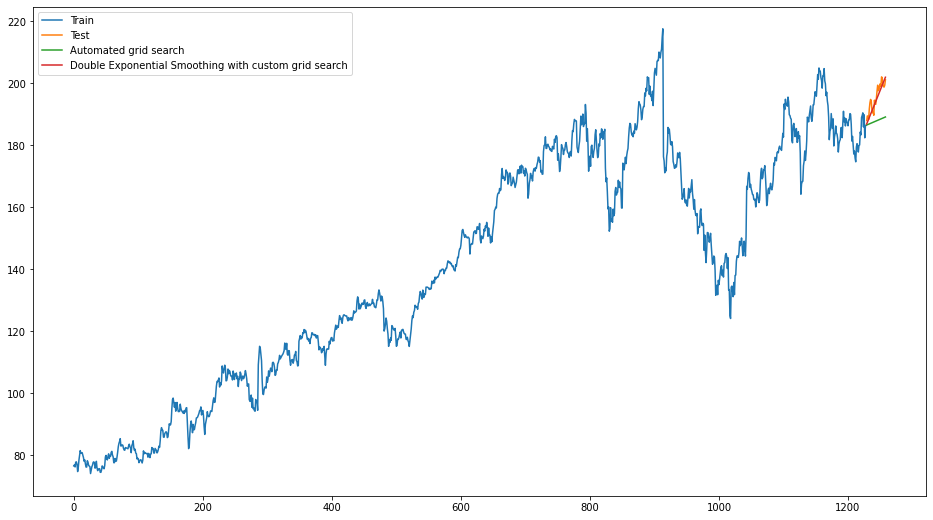

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

# 3. Triple Exponential Smoothing

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [29]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))


In [32]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, 
                                    smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Starting Grid Search..



KeyboardInterrupt



In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

In [ ]:
df_results_moni.info()

In [ ]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.9, 
                                    smoothing_slope=0.6, damping_slope = 0.6,use_boxcox=False,use_basinhopping = True,optimized=False)

In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

In [ ]:
# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [ ]:
fitESAUTO.summary()

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)

In [ ]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

# Therefore, you can conclude the following:

# •If there is no presence of trend or seasonality, then use simple exponential smoothing.
# •If there is a presence of trend and no seasonality, use double exponential smoothing.
# •If there is a presence of trend and seasonality, then use triple exponential smoothing.